In [1]:
%matplotlib notebook
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import interact, interactive, interactive_output, fixed, FloatRangeSlider, IntSlider, HBox, Layout, Output, VBox
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("../../SemiconductorPhysics/pythonScripts")
from helper import *
import matplotlib.patches as mpatches

plt.style.use('ggplot')

In [2]:
Ks = 11.7
NA =1e14
ND =1e14
xmin = -1.2e-2
xmax=1.2e-2
T=300
Va=0

VBI = Vbi(NA, ND, niSi(T), T)
    
XN = xn(NA, ND, VBI, Ks, Va)
XP = xp(NA, ND, VBI, Ks, Va)
    
xs = np.linspace(-XP, XN, 100)
Es = np.array([E(XP, XN, NA, ND, x, Ks, Va) for x in xs])/(1e4)
Vs = np.array([V(XP, XN, NA, ND, x, VBI, Ks, Va) for x in xs])

<IPython.core.display.Javascript object>


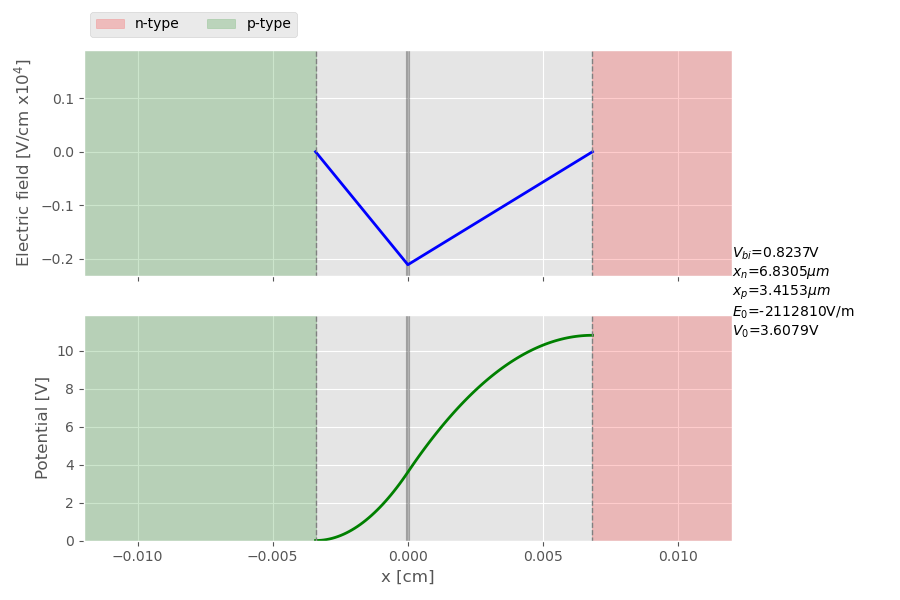

In [3]:
fig, ax = plt.subplots(2, 1, figsize=(9, 6), sharex=True)
#plt.subplots_adjust(left=0.05, bottom=None, right=1, top=None, wspace=None, hspace=1.)

line_7, = ax[0].plot([0, 0], [100*min(Es), 100*abs(min(Es))], "k", lw=3, alpha=0.3)
line_8, = ax[1].plot([0, 0], [-100, 100*abs(max(Vs))], "k", lw=3,alpha=0.3)
line_1, = ax[0].plot(xs, Es, "b", lw=2)
line_2, = ax[0].plot([-XP, XP], [100*min(Es), 100*abs(min(Es))],  "--", color="grey",lw=1)
line_3, = ax[0].plot([XN, XN], [100*min(Es), 100*abs(min(Es))],  "--", color="grey",lw=1)

red_patch = mpatches.Patch(color='red', label='n-type', alpha=0.2)
green_patch = mpatches.Patch(color='green', label='p-type', alpha=0.2)

ax[0].legend(handles=[red_patch, green_patch], bbox_to_anchor=(0, 1.2), ncol=2, loc='upper left')

line_4, = ax[1].plot(xs, Vs, "g", lw=2)
line_5, = ax[1].plot([-XP, XP], [-100, 100*abs(max(Vs))],  "--", color="grey",lw=1)
line_6, = ax[1].plot([XN, XN], [-100, 100*abs(max(Vs))],  "--", color="grey",lw=1)

shade1 = ax[0].axvspan(XN, xmax, alpha=0.2, color='red')
shade2 = ax[0].axvspan(xmin, -XP, alpha=0.2, color='green')

shade3 = ax[1].axvspan(XN, xmax, alpha=0.2, color='red')
shade4 = ax[1].axvspan(xmin, -XP, alpha=0.2, color='green')


textstr='$V_{bi}$=%.4fV\n$x_n$=%.4f$\mu m$\n$x_p$=%0.4f$\mu m$\n$E_0$=%0.4fV/m\n$V_0$=%0.4fV'%(VBI, 
                                                                                               XN*1e3, 
                                                                                               XP*1e3,
                                                                                               E(XP, XN, NA, ND, 0, Ks, Va)*1000,
                                                                                               V(XP, XN, NA, ND, 0, VBI, Ks, Va))
text1 = ax[1].text(xmax, max(Vs)/2, textstr, fontsize=10)

ax[0].set_xlim([xmin, xmax])
ax[1].set_xlim([xmin, xmax])

ax[0].set_ylabel("Electric field [V/cm x$10^4$]")
ax[1].set_ylabel("Potential [V]")
ax[1].set_xlabel("x [cm]")

plt.tight_layout()
#Define plot updater
def update(NA, ND, T, Va):
    NA = NA*(1e14)
    ND = ND*(1e14)
    
    VBI = Vbi(NA, ND, niSi(T), T)
    
    XN = xn(NA, ND, VBI, Ks, Va)
    XP = xp(NA, ND, VBI, Ks, Va)
    
    xs = np.linspace(-XP, XN, 100)
    
    Es = np.array([E(XP, XN, NA, ND, x, Ks, Va) for x in xs])/(1e4)
    Vs = np.array([V(XP, XN, NA, ND, x, VBI, Ks, Va) for x in xs])
   
    textstr='$V_{bi}$=%.4fV\n$x_n$=%.4f$\mu m$\n$x_p$=%0.4f$\mu m$\n$E_0$=%0.0fV/m\n$V_0$=%0.4fV'%(VBI, 
                                                                                               XN*1e3, 
                                                                                               XP*1e3,
                                                                                               E(XP, XN, NA, ND, 0, Ks, Va)*1000,
                                                                                               V(XP, XN, NA, ND, 0, VBI, Ks, Va))
    text1.set_text(textstr)
    text1.set_y(max(Vs))
    
    line_1.set_data(xs, Es)
    line_2.set_xdata([-XP, -XP])
    line_3.set_xdata([XN, XN])
    
    line_4.set_data(xs, Vs)    
    line_5.set_xdata([-XP, -XP])
    line_6.set_xdata([XN, XN])
    
    shade1.set_xy([[XN, 0.        ],
       [XN, 1.        ],
       [xmax     , 1.        ],
       [xmax     , 0.        ],
       [XN, 0.        ]])
    
    shade2.set_xy([[xmin     ,  0.        ],
       [xmin     ,  1.        ],
       [-XP,  1.        ],
       [-XP,  0.        ],
       [xmin     ,  0.        ]])
    shade3.set_xy([[XN, 0.        ],
       [XN, 1.        ],
       [xmax     , 1.        ],
       [xmax     , 0.        ],
       [XN, 0.        ]])
    
    shade4.set_xy([[xmin     ,  0.        ],
       [xmin     ,  1.        ],
       [-XP,  1.        ],
       [-XP,  0.        ],
       [xmin     ,  0.        ]])
        
    ax[0].set_ylim([1.1*min(Es), 0.9*abs(min(Es))])
    ax[1].set_ylim([-0.01, 1.1*max(Vs)])
    
    fig.canvas.draw_idle()
    return 
#Define control elements
s1=widgets.FloatSlider(
    min=1,
    max=10,
    step=1,
    value=1,
    layout=Layout(width='500px'),
    description='$N_A$ (1e14)',
    style = {'description_width': 'initial'})

s2=widgets.FloatSlider(
    min=1,
    max=10,
    step=1,
    value=1,
    layout=Layout(width='500px'),
    description='$N_D (1e14)$',
    style = {'description_width': 'initial'})

s3=widgets.FloatSlider(
    min=50,
    max=400,
    step=10,
    value=300,
    layout=Layout(width='500px'),
    description='T',
    style = {'description_width': 'initial'})

s4=widgets.FloatSlider(
    min=-10,
    max=0.4,
    step=0.1,
    value=0,
    layout=Layout(width='500px'),
    description='$V_{a}$',
    style = {'description_width': 'initial'})

#Connect controls to plot
out = interactive_output(update, {'NA': s1, 'ND': s2, 'T': s3, 'Va': s4})

#Set layout
Vbox_layout = Layout(display='flex', flex_flow='column', justify_content='space-between', align_items='center')

#Display output
display(VBox([s1, s2, s3, s4], layout=Vbox_layout))